# Cadenas de Transmisión

## Step 1. load the locality

In [1]:
x <- rgeomex::extract_locality(cve_edo = "31", locality = "Buuctzots")

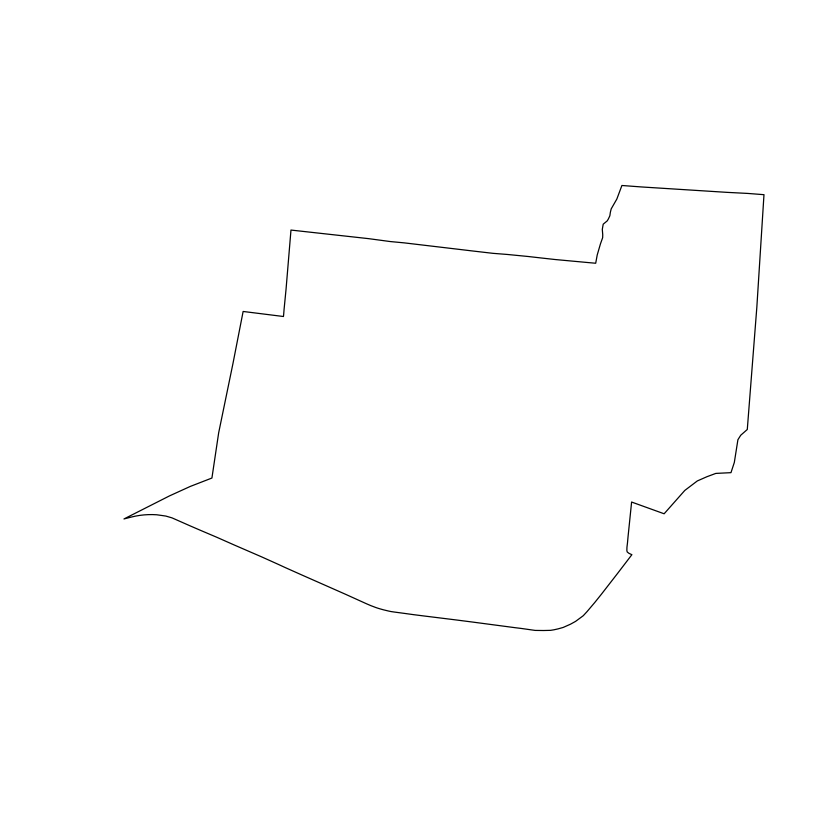

In [2]:
plot(sf::st_geometry(x))

## Step 2. load the geocoded dengue dataset

In [20]:
if(as.vector(Sys.info()["sysname"]) == "Darwin"){
    load("~/Library/CloudStorage/OneDrive-Personal/proyects/geocoding_mex/2023/9.geocoded_dataset/dengue_mx_2023.RData")
    
} else if(as.vector(Sys.info()["sysname"]) == "Windows"){
    load("D:/OneDrive/proyects/geocoding_mex/2023/9.geocoded_dataset/dengue_mx_2023.RData")

} else if(as.vector(Sys.info()["sysname"]) == "Linux"){
    
}

In [6]:
head(z)

,V1,VEC_ID,IDE_EDA_ANO,IDE_SEX,DES_CAL,IDE_CAL,NUM_EXT,NUM_INT,IDE_COL,IDE_CP,⋯,DES_INS_UNIDAD,DENGUE_SER_TRIPLEX,FEC_INGRESO,lat,long,accuracy,formatted_address,address_type,status,index
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<int>,<IDate>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,1005532,15,1,CALLE,CALLE 61,629,,Hacienda SAN PEDRO NOH PAT H,97370,⋯,IMSS,1,NA,20.95127,-89.55794,street_address,"C. 61 629, Polígono San Pedro, 97370 Kanasín, Yuc., Mexico",street_address,OK,1
2,2,1005536,46,2,CALLE,CALLE ALMACIGO,206,,Colonia JARDINES DE VIRGINIA C,94294,⋯,ISSSTE,NA,NA,19.15873,-96.11549,street_address,"Almácigo 206, Jardines del Virginia, 94294 Veracruz, Ver., Mexico",street_address,OK,2
3,3,1005537,3,2,CALLE,CALLE 65,216,B,Colonia REPARTO LAS GRANJAS C,97370,⋯,IMSS,NA,NA,20.92060,-89.57670,street_address,"C. 65 216, Centro, 97370 Kanasín, Yuc., Mexico",street_address,OK,3
4,4,1005542,16,1,CALLE,CALLE 25 A,348,,Fraccionamiento BENITO JUÁREZ OTE F,97178,⋯,IMSS,1,NA,20.97452,-89.56803,street_address,"C. 25-A 348, Salvador Alvarado Oriente, 97166 Mérida, Yuc., Mexico",street_address,OK,4
5,5,1005547,9,1,CALLE,CALLE DOMICILIO CONOCIDO,,,Colonia EL VERGEL UNIDO Y ORGANIZADO C,30735,⋯,SSA,1,2023-01-30,14.90206,-92.27966,postal_code,"El Pedregal, 30735 Tapachula de Córdova y Ordoñez, Chis., Mexico",postal_code,OK,5
6,6,1005550,31,2,AVENIDA,AVENIDA SD,27,3,Colonia SUPERMANZANA 77 C,77528,⋯,IMSS,NA,NA,21.19666,-86.82329,postal_code,"Supermanzana 77, Jardines de Bonampak, 77528 Cancún, Q.R., Mexico",postal_code,OK,6


## Step 3. Transform the df to sf object

In [21]:
z <- z |> 
dplyr::mutate(x = long, 
              y = lat) |>
sf::st_as_sf(coords = c("x", "y"), crs = 4326)

In [26]:
library(mapview)
mapviewOptions(fgb = FALSE, georaster = FALSE)
mapview::mapView(z)

## Step 4. extract the dengue cases in the locality

In [16]:
z <- z[x,] |> sf::st_drop_geometry() |> as.data.frame()

In [19]:
table(z$VEC_ID)


1001403 1002109 1002414 1002849 1003729 1003746 1003798 1003895 1005406 1006246 
      1       1       1       1       1       1       1       1       1       1 
1006268 1007309 
      1       1 